In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from jupyterthemes import jtplot
jtplot.style(theme='oceans16', context='notebook', ticks=True, grid=False)

from sklearn.preprocessing import LabelEncoder 
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("Cleaned_Features.csv")
df.drop(columns=['Unnamed: 0'],axis=1,inplace = True)
df.drop(columns=['Cars_Category'],axis=1,inplace = True)
df.head()

,price,enginetype,fueltype,aspiration,carbody,cylindernumber,drivewheel,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth
0,13495,dohc,gas,std,convertible,four,rwd,88.6,2548,130,3.47,111,21,27,168.8,64.1
1,16500,dohc,gas,std,convertible,four,rwd,88.6,2548,130,3.47,111,21,27,168.8,64.1
2,16500,ohcv,gas,std,hatchback,six,rwd,94.5,2823,152,2.68,154,19,26,171.2,65.5
3,13950,ohc,gas,std,sedan,four,fwd,99.8,2337,109,3.19,102,24,30,176.6,66.2
4,17450,ohc,gas,std,sedan,five,4wd,99.4,2824,136,3.19,115,18,22,176.6,66.4


### Label Encoding the Categorical Variables

In [3]:
# Class to handle columns encoding
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self 

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        ref_dic = []  # array to store refrence dictionaries for each column
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)
    
  

In [4]:
# Encode the columns
df_encoded =  MultiColumnLabelEncoder(columns = ['enginetype','fueltype','aspiration','carbody','cylindernumber','drivewheel']).fit_transform(df)
df_encoded.head()

,price,enginetype,fueltype,aspiration,carbody,cylindernumber,drivewheel,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth
0,13495,0,1,0,0,2,2,88.6,2548,130,3.47,111,21,27,168.8,64.1
1,16500,0,1,0,0,2,2,88.6,2548,130,3.47,111,21,27,168.8,64.1
2,16500,5,1,0,2,3,2,94.5,2823,152,2.68,154,19,26,171.2,65.5
3,13950,3,1,0,3,2,1,99.8,2337,109,3.19,102,24,30,176.6,66.2
4,17450,3,1,0,3,1,0,99.4,2824,136,3.19,115,18,22,176.6,66.4


In [5]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           205 non-null    int64  
 1   enginetype      205 non-null    int32  
 2   fueltype        205 non-null    int32  
 3   aspiration      205 non-null    int32  
 4   carbody         205 non-null    int32  
 5   cylindernumber  205 non-null    int32  
 6   drivewheel      205 non-null    int32  
 7   wheelbase       205 non-null    float64
 8   curbweight      205 non-null    int64  
 9   enginesize      205 non-null    int64  
 10  boreratio       205 non-null    float64
 11  horsepower      205 non-null    int64  
 12  citympg         205 non-null    int64  
 13  highwaympg      205 non-null    int64  
 14  carlength       205 non-null    float64
 15  carwidth        205 non-null    float64
dtypes: float64(4), int32(6), int64(6)
memory usage: 20.9 KB


In [6]:
# getting the reference mapping for each column by inverse transform
columns =  ['enginetype','fueltype','aspiration','carbody',
                                   'cylindernumber','drivewheel']
ref_dict = []
for col in columns:
    le = LabelEncoder().fit(df[col])
    df[col] = le.transform(df[col])
    L = list(le.inverse_transform(df[col]))
    d = dict(zip(le.classes_, le.transform(le.classes_)))
    ref_dict.append(d)

ref_dict

[{'dohc': 0, 'dohcv': 1, 'l': 2, 'ohc': 3, 'ohcf': 4, 'ohcv': 5, 'rotor': 6},
 {'diesel': 0, 'gas': 1},
 {'std': 0, 'turbo': 1},
 {'convertible': 0, 'hardtop': 1, 'hatchback': 2, 'sedan': 3, 'wagon': 4},
 {'eight': 0,
  'five': 1,
  'four': 2,
  'six': 3,
  'three': 4,
  'twelve': 5,
  'two': 6},
 {'4wd': 0, 'fwd': 1, 'rwd': 2}]

## K-Means Clustering 
We will loop from 1 to 10 clusters to find the best number using the `Elbow Method` <br>
Elbow Method : is when the graph shows a turn on the best number of clusters 

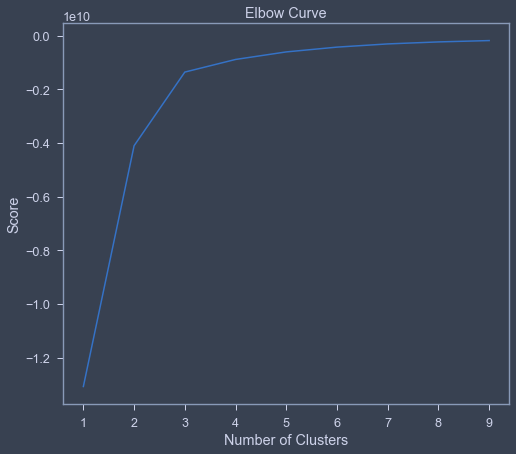

In [7]:
# get right number of cluster for K-means so we neeed to loop from 1 to 20 number of cluster and check score.
#Elbow method is used to represnt that. 
nb_clusters = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in nb_clusters]
score = [kmeans[i].fit(df_encoded).score(df_encoded) for i in range(len(kmeans))]
plt.plot(nb_clusters,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

#### The Elbow Method shows that 3 is the optimal number of clusters

In [8]:
#fitting data in Kmeans theorem.
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_encoded)
df_encoded['cluster'] = kmeans.labels_
df_clustered = df_encoded

In [9]:
# To the number of cars in each cluster
df_clustered.loc[df_clustered.cluster == 0].count()

price             124
enginetype        124
fueltype          124
aspiration        124
carbody           124
cylindernumber    124
drivewheel        124
wheelbase         124
curbweight        124
enginesize        124
boreratio         124
horsepower        124
citympg           124
highwaympg        124
carlength         124
carwidth          124
cluster           124
dtype: int64

In [10]:
df_clustered.loc[df_clustered.cluster == 1].count()

price             17
enginetype        17
fueltype          17
aspiration        17
carbody           17
cylindernumber    17
drivewheel        17
wheelbase         17
curbweight        17
enginesize        17
boreratio         17
horsepower        17
citympg           17
highwaympg        17
carlength         17
carwidth          17
cluster           17
dtype: int64

In [11]:
df_clustered.loc[df_clustered.cluster == 2].count()

price             64
enginetype        64
fueltype          64
aspiration        64
carbody           64
cylindernumber    64
drivewheel        64
wheelbase         64
curbweight        64
enginesize        64
boreratio         64
horsepower        64
citympg           64
highwaympg        64
carlength         64
carwidth          64
cluster           64
dtype: int64

### Cluster 1 : 124 ,,, Cluster 2 : 17 , Cluster 3 : 64

<AxesSubplot:xlabel='cluster', ylabel='price'>

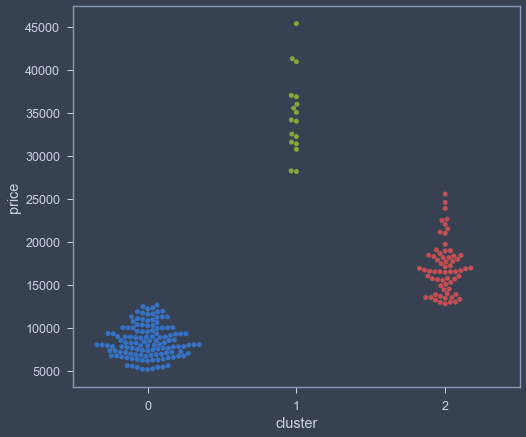

In [12]:
# visualize clusters
sns.swarmplot(df_clustered.cluster,df_clustered.price)

# 1:low price , 2: high  , 3 : medium

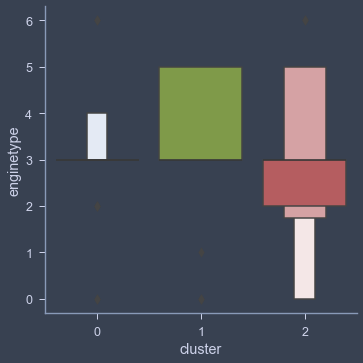

In [13]:
# enginetypes with clusters
sns.catplot(x="cluster", y="enginetype",kind='boxen', data=df_clustered)

<AxesSubplot:xlabel='cluster', ylabel='wheelbase'>

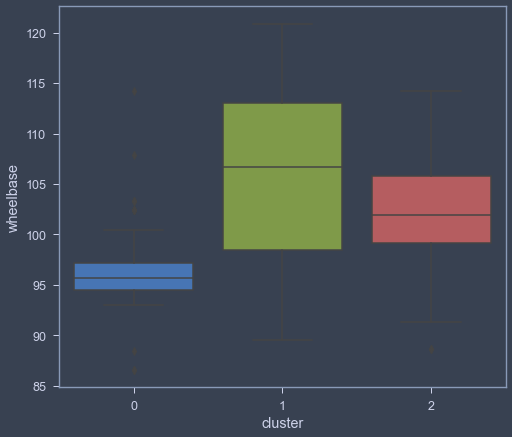

In [14]:
# wheelbase in clusters
sns.boxplot(df_clustered.cluster,df_clustered.wheelbase)

# 0 : low    1: High       2: medium

<AxesSubplot:xlabel='cluster', ylabel='curbweight'>

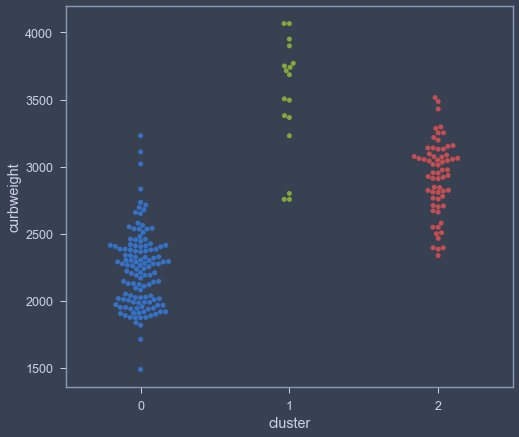

In [15]:
# curbweight 
sns.swarmplot(df_clustered.cluster,df_clustered.curbweight)

<AxesSubplot:xlabel='cluster', ylabel='enginesize'>

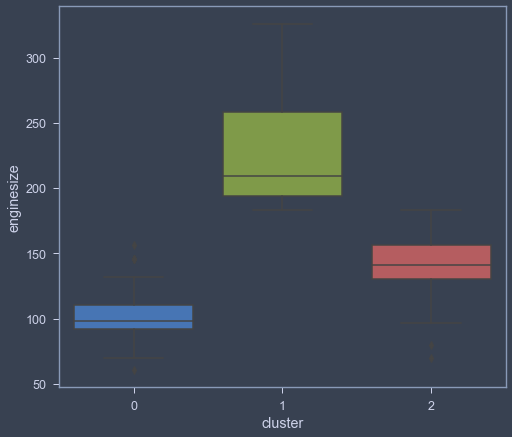

In [16]:
# Engine size
sns.boxplot(df_clustered.cluster,df_clustered.enginesize)

<AxesSubplot:xlabel='cluster', ylabel='horsepower'>

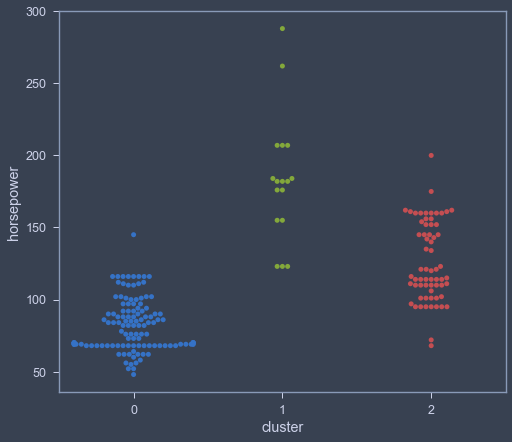

In [17]:
# Horse power
sns.swarmplot(df_clustered.cluster,df_clustered.horsepower)

<AxesSubplot:xlabel='cluster', ylabel='citympg'>

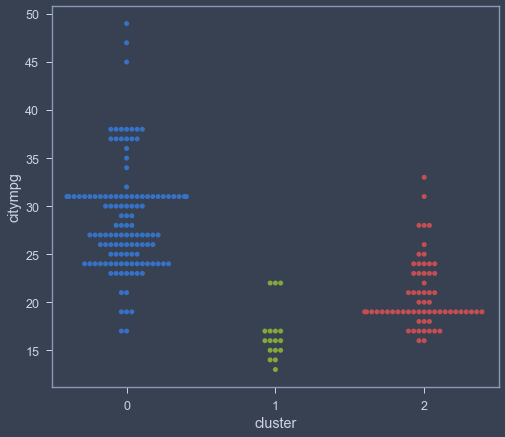

In [18]:
# CityMPG
sns.swarmplot(df_clustered.cluster,df_clustered.citympg)

# cluster -> 0 : high , 1: low , 2: medium

<AxesSubplot:xlabel='cluster', ylabel='carlength'>

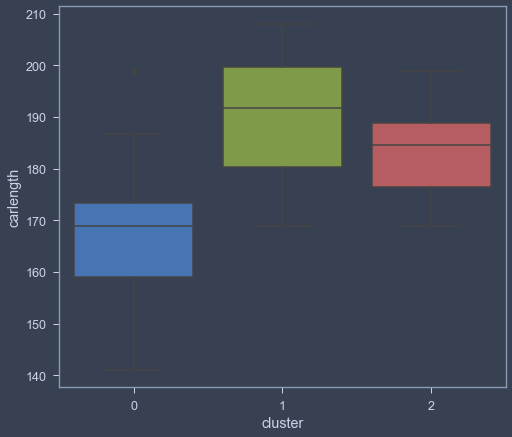

In [19]:
# Car lenght
sns.boxplot(df_clustered.cluster,df_clustered.carlength)


<AxesSubplot:xlabel='cluster', ylabel='carwidth'>

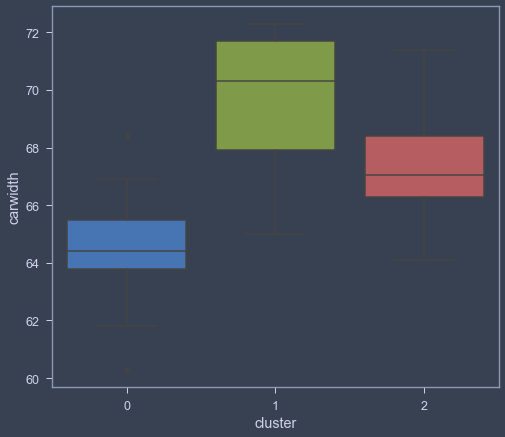

In [20]:
# Carwidth
sns.boxplot(df_clustered.cluster,df_clustered.carwidth)


### Main Clusters: 
`Cluster 0 `: low price cars with low curbweight,wheelbase,horsepower and engine size but high mpg <br>
`Cluster 1 `: High price cars with high curbweight,wheelbase,horsepower and engine size but very low mpg  <br>
`Cluster 2 `: Medium price cars with Medium curbweight,wheelbase,horsepowe,engine size and medium mpg 

In [21]:
df_models = pd.read_csv('Cleaned_fearures_withNames.csv')
df_models

,Unnamed: 0,Model,Make,price,Cars_Category,enginetype,fueltype,aspiration,carbody,cylindernumber,drivewheel,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth
0,0,giulia,alfa-romero,13495,Medium_Range,dohc,gas,std,convertible,four,rwd,88.6,2548,130,3.47,111,21,27,168.8,64.1
1,1,stelvio,alfa-romero,16500,Medium_Range,dohc,gas,std,convertible,four,rwd,88.6,2548,130,3.47,111,21,27,168.8,64.1
2,2,Quadrifoglio,alfa-romero,16500,Medium_Range,ohcv,gas,std,hatchback,six,rwd,94.5,2823,152,2.68,154,19,26,171.2,65.5
3,3,100 ls,audi,13950,Medium_Range,ohc,gas,std,sedan,four,fwd,99.8,2337,109,3.19,102,24,30,176.6,66.2
4,4,100ls,audi,17450,Medium_Range,ohc,gas,std,sedan,five,4wd,99.4,2824,136,3.19,115,18,22,176.6,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,200,145e (sw),volvo,16845,Medium_Range,ohc,gas,std,sedan,four,rwd,109.1,2952,141,3.78,114,23,28,188.8,68.9
201,201,144ea,volvo,19045,Medium_Range,ohc,gas,turbo,sedan,four,rwd,109.1,3049,141,3.78,160,19,25,188.8,68.8
202,202,244dl,volvo,21485,Medium_Range,ohcv,gas,std,sedan,six,rwd,109.1,3012,173,3.58,134,18,23,188.8,68.9
203,203,246,volvo,22470,Medium_Range,ohc,diesel,turbo,sedan,six,rwd,109.1,3217,145,3.01,106,26,27,188.8,68.9


In [25]:
df_clustered.to_csv('Main Clustered Data.csv',index=False)

In [24]:
df = df_models.join(df_clustered['cluster'])
df = df[['Model','Make','cluster']]
df.to_csv('Clustered Cars.csv')